In [1]:
import yahoo_fin.options as ops
import yahoo_fin.stock_info as si
import opstrat as op
import datetime
import pandas as pd

In [2]:
today = datetime.date.today()
formatted_date = today.strftime('%m/%d/%Y')
formatted_date

'04/29/2023'

In [3]:
stock = input("Enter Stock>>>")

Enter Stock>>>SOFI


In [4]:
expiration_dates = ops.get_expiration_dates(stock)
#expiration_dates

In [5]:
Calls = ops.get_calls(stock,expiration_dates[-3])
Calls.set_index("Contract Name",inplace = True)
#Calls

In [6]:
Puts = ops.get_puts(stock,expiration_dates[-3])
Puts.set_index("Contract Name",inplace = True)
#Puts

### Single Plot

In [7]:
Call = Calls.iloc[1]
Call

Last Trade Date       2023-04-27 10:03AM EDT
Strike                                   2.5
Last Price                              3.75
Bid                                     3.85
Ask                                     3.95
Change                                   0.0
% Change                                   -
Volume                                    25
Open Interest                            624
Implied Volatility                    97.27%
Name: SOFI231215C00002500, dtype: object

In [8]:
daily = si.get_data(stock, start_date="04/26/2022", end_date=today, index_as_date = True, interval="1d")
today = daily.iloc[-1]
#today

In [9]:
daily

,open,high,low,close,adjclose,volume,ticker
2022-04-26,6.500,6.50,6.14,6.29,6.29,49526100,SOFI
2022-04-27,6.250,6.46,6.09,6.15,6.15,42697500,SOFI
2022-04-28,6.300,6.54,6.02,6.45,6.45,46069000,SOFI
2022-04-29,6.370,6.75,6.10,6.12,6.12,33526800,SOFI
2022-05-02,6.105,6.34,6.01,6.33,6.33,43738400,SOFI
...,...,...,...,...,...,...,...
2023-04-24,5.920,5.95,5.79,5.83,5.83,20058000,SOFI
2023-04-25,5.775,5.84,5.72,5.75,5.75,21036200,SOFI
2023-04-26,5.810,5.88,5.66,5.67,5.67,24210900,SOFI
2023-04-27,5.770,6.19,5.75,6.06,6.06,43199900,SOFI


In [ ]:
#daily['close']

In [10]:
dailyPctChange = daily['close'].pct_change()
avgDailyChange = dailyPctChange.mean()
#avgDailyChange = print("daily percent change = ", "{:.2%}".format(dailyPctChange.mean()))

In [11]:
avgDailyChange

0.0009881073270132051

In [12]:
Spot = today[3]
Strike = Call[1]
optionPrice = Call[2]

In [17]:
#pct_change = int(Strike/10)
ploss = {'Equity Market Price at Expiry': [Strike-2.5,Strike,Strike+4,
                                           Strike+8,Strike+12]}
#noc = int(Call[-3]) #number of contracts bought/sold
sperc = 100*1 #100 shares per contract
df = pd.DataFrame(ploss, columns = ['Equity Market Price at Expiry','Profit/Loss'])
payoffs = []
for i in df['Equity Market Price at Expiry']:

# Calculate Option Payoffs
        payoff = max(((i - Strike) * sperc) - (Call[2]*sperc),-Call[2]*sperc)
        payoffs.append(payoff)

# Create DataFrame
ploss['Profit/Loss']=payoffs
final=pd.DataFrame(ploss,columns=['Equity Market Price at Expiry','Profit/Loss']).set_index('Equity Market Price at Expiry')

final

,Profit/Loss
Equity Market Price at Expiry,
0.0,-375.0
2.5,-375.0
6.5,25.0
10.5,425.0
14.5,825.0


In [18]:
#noc = int(Call[-3]) #number of contracts bought/sold
sperc = 100*1 #100 shares per contract
df = pd.DataFrame(ploss, columns = ['Equity Market Price at Expiry','Profit/Loss'])
payoffs = []
for i in df['Equity Market Price at Expiry']:

# Calculate Option Payoffs
        payoff = max(((i - Strike) * sperc) - (optionPrice*sperc),-optionPrice*sperc)
        payoffs.append(payoff)

# Create DataFrame
ploss['Profit/Loss']=payoffs
final=pd.DataFrame(ploss,columns=['Equity Market Price at Expiry','Profit/Loss']).set_index('Equity Market Price at Expiry')

final

,Profit/Loss
Equity Market Price at Expiry,
0.0,-375.0
2.5,-375.0
6.5,25.0
10.5,425.0
14.5,825.0


In [ ]:
op.single_plotter(spot=Spot, strike=Strike, op_type='c', tr_type='b', op_pr=Call[2])

### Put Option

In [20]:
Put = Puts.iloc[1]
Put

Last Trade Date       2023-04-28 2:04PM EDT
Strike                                  2.5
Last Price                             0.11
Bid                                    0.09
Ask                                    0.13
Change                                 0.02
% Change                            +22.22%
Volume                                  392
Open Interest                          8930
Implied Volatility                   85.94%
Name: SOFI231215P00002500, dtype: object

In [21]:
Strike1 = Put[1]
#Strike2 = Call[1]
Strike1

2.5

In [22]:
putOptionPrice = Put[2]
putOptionPrice

0.11

In [ ]:
#callOptionPrice = Call[2]
#callOptionPrice

In [23]:
Spot

6.230000019073486

In [24]:
ploss = {'Equity Market Price at Expiry': [max(Strike1-1.5,0),Strike1-1,Strike1-.5,
                                           Strike1,Strike1+.5]}
sperc = 100*1 #100 shares per contract
df = pd.DataFrame(ploss, columns = ['Equity Market Price at Expiry','Profit/Loss'])
payoffs = []
for i in df['Equity Market Price at Expiry']:

# Calculate Option Payoffs
        payoff = max(((Strike1 - i) * sperc) - (putOptionPrice*sperc),-putOptionPrice*sperc)
        payoffs.append(payoff)

# Create DataFrame
ploss['Profit/Loss']=payoffs
final=pd.DataFrame(ploss,columns=['Equity Market Price at Expiry','Profit/Loss']).set_index('Equity Market Price at Expiry')

final

,Profit/Loss
Equity Market Price at Expiry,
1.0,139.0
1.5,89.0
2.0,39.0
2.5,-11.0
3.0,-11.0


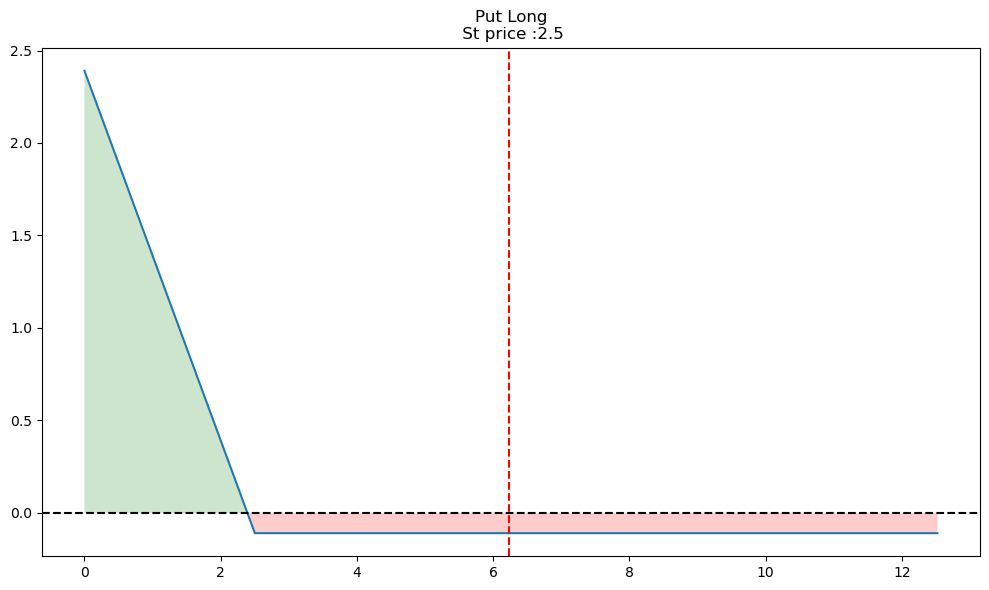

In [31]:
op.single_plotter(spot=Spot, strike=Strike1, op_type='p', tr_type='b', op_pr=putOptionPrice,spot_range = 100)

In [ ]:
#noc = int(Call[-3]) #number of contracts bought/sold
sperc = 100*1 #100 shares per contract
df = pd.DataFrame(ploss, columns = ['Equity Market Price at Expiry','Profit/Loss'])
payoffs = []
for i in df['Equity Market Price at Expiry']:

# Calculate Option Payoffs
        payoff = max(((i - Strike) * sperc) - (optionPrice*sperc),-optionPrice*sperc)
        payoffs.append(payoff)

# Create DataFrame
ploss['Profit/Loss']=payoffs
final=pd.DataFrame(ploss,columns=['Equity Market Price at Expiry','Profit/Loss']).set_index('Equity Market Price at Expiry')

final

In [ ]:
op1={'op_type': 'p', 'strike': Strike1, 'tr_type': 's', 'op_pr': Call[2]}
op2={'op_type': 'c', 'strike': Strike2, 'tr_type': 'b', 'op_pr': Put[2]}

op_list=[op1, op2]
op.multi_plotter(spot=Spot, op_list=op_list)